In [1]:
from smc import SMCController##引用库

In [2]:
import time
import matplotlib.pyplot as plt

In [7]:
##一次性连接并使能一个轴
smc = SMCController()
# 初始化连接
result = smc.board_init(0, 1, "COM3", 115200)
# 执行其他操作
smc.write_sevon_pin(0, 0,0)
#smc.basic_run(0)
# 关闭连接
#smc.board_close(0)

0

In [42]:
#connect_no:指定链接号，0-254，默认0
#axis:指定轴号，0-（控制器最大轴数-1）
#el_enable:EL信号的使能状态：0正负限位禁止；1正负限位允许、2正限位禁止、负限位允许；3正负限位允许、负限位禁止
#el_logic:EL信号的逻辑状态：0正负限位低电平有效，1：正负限位高电平有效；2正限位低有效，负限位高有效；3正限位高有效，负限位低有效
#el_mode:EL制动方式：0：正负限位立即停止；1：正负限位减速停止；2：正限位立即停止；3：正限位立即停止、负限位减速停止；4：正限位减速停止、负限位立即停止
#适用范围：脉冲型全系列控制器
#开关接在EL0和EGND中间
#smc.set_el_mode(0,0,2,0,0)#回原点运动，会触发反向运动
#smc.set_el_mode(0,0,2,1,0)#正向vmove运动，
smc.set_el_mode(0,0,3,0,0)#
#home()

0

In [3]:
####展示smc库目前已支持的函数
functions=SMCController().smc_dll.__dict__.keys()
print(len(functions))
for function in functions:
    print(function)


28
_name
_FuncPtr
_handle
smc_board_init
smc_board_close
smc_get_position_unit
smc_write_sevon_pin
smc_basic_run
smc_basic_stop
smc_set_home_profile_unit
smc_set_home_position_unit
smc_set_homemode
smc_get_homemode
smc_home_move
smc_set_el_mode
smc_get_el_mode
smc_ptt_table_unit
smc_pts_table_unit
smc_pvt_move
smc_t_pmove_extern_unit
smc_set_profile_unit
smc_set_s_profile
smc_vmove
smc_sine_oscillate_set_mode
smc_sine_oscillate_get_mode
smc_sine_oscillate_unit
smc_sine_oscillate_stop
smc_stop


In [ ]:
#串口连接
result = smc.board_init(0, 1, "COM3", 115200)

In [31]:
#使能0轴
smc.write_sevon_pin(0, 0, 0)

0

In [44]:
#关闭0轴
smc.write_sevon_pin(0, 0, 1)   

0

In [4]:
def home():    # 按指定的方向和速度方式开始回原点
    smc.set_home_profile_unit(0,0,99,30000,1,1)
    smc.set_home_position_unit(0,0,1,0)
    smc.set_homemode(0,0,0,1,0,1)
    smc.home_move(0,0)
    smc.get_homemode(0,0)

In [36]:
home()

In [ ]:
#设置ptt运动参数,分十次
ptime=[]
ppos=[]
for i in range(20):
    ptime.append(i)
    ppos.append(50000*i)
#ptime=[1,2,3,4,5,6,7,8,9,10,11,12,13,]
#ppos=[10000,20000,30000]
smc.ptt_table_unit(0,0,20,ptime,ppos)

In [ ]:
#设置ptt运动参数，从0运行到450000，再回到0
ptime=[]
ppos=[]
for i in range(10):
    ptime.append(2*i)
    ppos.append(60000*i)
for i in range(11):
    ptime.append(20+2*i)
    ppos.append(600000-60000*i)
#ptime=[1,2,3,4,5,6,7,8,9,10,11,12,13,]
#ppos=[10000,20000,30000]
smc.ptt_table_unit(0,0,21,ptime,ppos)
print(ptime,ppos)

In [7]:
ptime=[0,6]
ppos=[0,500000]
smc.ptt_table_unit(0,0,2,ptime,ppos)

0

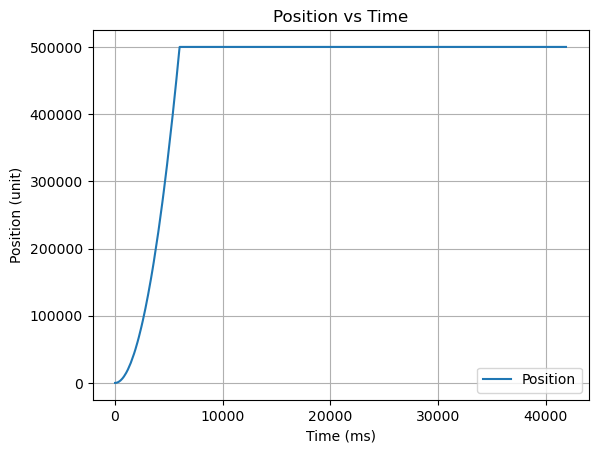

In [10]:
smc.pvt_move(0,1,[0])
plot_data(5000)

In [14]:
smc.sine_oscillate_set_mode(0,0,0)
#smc.sine_oscillate_get_mode(0,0)
#smc.sine_oscillate_unit(0,0,10000,2)
#plot_data()
#smc.sine_oscillate_stop(0,0)

10010

In [ ]:
#设置ptt运动参数
ptime=[]
ppos=[]
for i in range(20):
    ptime.append(2*i)
    if i%2:
        ppos.append(600000)
    else:
        ppos.append(100000)
ppos[0]=0
print(ptime,ppos)

In [ ]:
smc.ptt_table_unit(0,0,20,ptime,ppos)

In [ ]:
#设置pts运动参数
ptime=[0,1,2,3,4,5,6]
ppos=[0,15000,65000,15000,65000,15000,650000]
pper=[60,60,60,60,60,60,60]

smc.pts_table_unit(0,0,7,ptime,ppos,pper)

In [8]:

def plot_data(ms=1000):
    x_time = []  # 毫秒级时间
    y_position = []  # 位置数据
    # 采集数据
    start_time = time.time()
    for _ in range(ms):  # 采集 100 个数据点
        position = smc.get_position_unit(0, 0)[1]
        # 获取当前时间（毫秒）
        current_time = (time.time() - start_time) * 1000
        x_time.append(current_time)
        # 获取当前位置
        y_position.append(position)
        # 等待 10 毫秒
        #time.sleep(0.01)

    # 绘制图像
    plt.plot(x_time, y_position, label="Position")
    plt.xlabel("Time (ms)")
    plt.ylabel("Position (unit)")
    plt.title("Position vs Time")
    plt.legend()
    plt.grid(True)
    plt.show()

In [7]:
def plot_3data(ms):
    # 初始化数据
    x_time = []  # 毫秒级时间
    y_position = []  # 位置数据
    y_velocity = []  # 速度数据
    y_acceleration = []  # 加速度数据

    start_time = time.time()
    for _ in range(ms):  # 采集 100 个数据点
        # 获取当前位置
        position = smc.get_position_unit(0, 0)[1]
        # 获取当前时间（毫秒）
        current_time = (time.time() - start_time) * 1000
        x_time.append(current_time)
        y_position.append(position)
        # 等待 10 毫秒
        #time.sleep(0.01)
    # 计算速度（位置差分）
    y_velocity = [0]  # 初始速度为 0
    for i in range(1, len(x_time)):
        delta_position = y_position[i] - y_position[i-1]
        delta_time = x_time[i] - x_time[i-1]
        velocity = delta_position / delta_time if delta_time != 0 else 0
        y_velocity.append(velocity*10**6)

    # 计算加速度（速度差分）
    y_acceleration = [0]  # 初始加速度为 0
    for i in range(1, len(x_time)):
        delta_velocity = y_velocity[i] - y_velocity[i-1]
        delta_time = x_time[i] - x_time[i-1]
        acceleration = delta_velocity / delta_time if delta_time != 0 else 0
        y_acceleration.append(acceleration*10**6)

    # 绘制图像

    plt.plot(x_time, y_velocity, label="velocity")
    plt.plot(x_time, y_acceleration, label="acceleration")
    plt.plot(x_time, y_position, label="Position")
    plt.xlabel("time(ms)") 
    plt.ylabel("position,velocity,acceleration")
    plt.title("Position,velocity,acceleration vs Time")
    plt.legend()
    plt.grid(True)
    plt.show()
    print(x_time)

In [ ]:
#开始PVT运动
smc.pvt_move(0,1,[0])   
plot_data(700)

In [14]:
smc.set_profile_unit(0,0,1,8000,0.1,0.1,2)

0

In [37]:
smc.write_sevon_pin(0,0,0)
smc.vmove(0,0,1)

0

In [80]:
#定速往复运动
#smc.write_sevon_pin(0,0,0)
#home()
smc.vmove(0,0,1)
time.sleep(2)
smc.stop(0,0,1)
j=True
print("运行时间：",26*10/60,"min")

for i in range(26):
    if j:
        smc.vmove(0,0,1)
        j=False
    else:
        smc.vmove(0,0,0)
        j=True
    time.sleep(10)
    print("已运行",i,"次")
    smc.stop(0,0,1)
print("运行结束")

运行时间： 4.333333333333333 min
已运行 0 次
已运行 1 次
已运行 2 次
已运行 3 次
已运行 4 次
已运行 5 次
已运行 6 次
已运行 7 次
已运行 8 次
已运行 9 次
已运行 10 次
已运行 11 次
已运行 12 次
已运行 13 次
已运行 14 次
已运行 15 次
已运行 16 次
已运行 17 次
已运行 18 次
已运行 19 次
已运行 20 次
已运行 21 次
已运行 22 次
已运行 23 次
已运行 24 次
已运行 25 次
运行结束


In [43]:
home()
print("24343",34)

24343 34


In [21]:
#驱动器断电后运行保平安
smc.stop(0,0,1)
smc.write_sevon_pin(0,0,0)
smc.stop(0,0,1)

0

In [52]:
smc.vmove(0,0,1)
time.sleep(11)
smc.stop(0,0,1)

0

In [33]:
#读取指令计数器值
smc.get_position_unit(0,0)

(0, -30600.0)

In [ ]:
#运行ram中的basic程序
smc.basic_run(0)

In [ ]:
#停止运行basic程序
smc.basic_stop(0)

In [45]:
#断开0号控制器的连接
smc.board_close(0)

0